In [ ]:
import tensorflow as tf
import numpy as np

In [3]:
#dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 
import time

In [5]:
print("Número de ejemplos de entrenamiento:", mnist.train.images.shape[0])
print("Número de ejemplos de validación:", mnist.validation.images.shape[0])
print("Número de ejemplos de prueba:", mnist.test.images.shape[0])
print("Tamaño de cada dígito:", mnist.train.images.shape[1])
print("Tamaño de cada etiqueta:", mnist.train.labels.shape[1])


Número de ejemplos de entrenamiento: 55000
Número de ejemplos de validación: 5000
Número de ejemplos de prueba: 10000
Tamaño de cada dígito: 784
Tamaño de cada etiqueta: 10


In [10]:
def muestra_digito(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return
def vis_imagen(i,conjunto="train"):
    if(conjunto=="train"):
        muestra_digito(mnist.train.images[i,])
        label = np.argwhere(mnist.train.labels[i])[0][0]
    elif(conjunto=="test"):
        muestra_digito(mnist.test.images[i,])
        label = np.argwhere(mnist.test.labels[i])[0][0]
    else:
        muestra_digito(mnist.validation.images[i,])
        label = np.argwhere(mnist.validation.labels[i])[0][0]
    print("Etiqueta "+ str(label))
    return
        

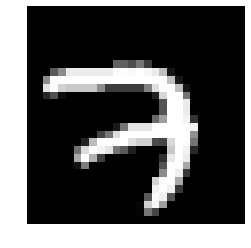

Etiqueta 7


In [11]:
vis_imagen(0,conjunto="train")

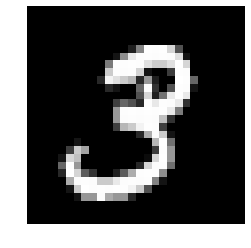

Etiqueta 3


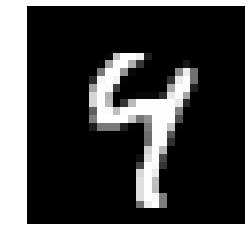

Etiqueta 4


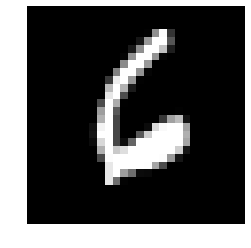

Etiqueta 6


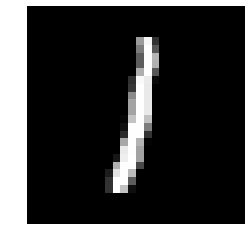

Etiqueta 1


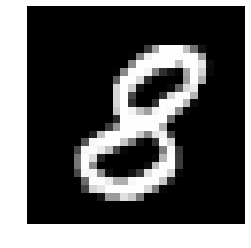

Etiqueta 8


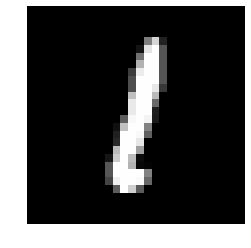

Etiqueta 1


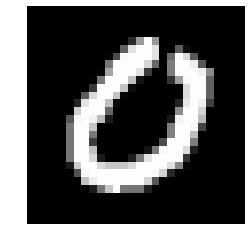

Etiqueta 0


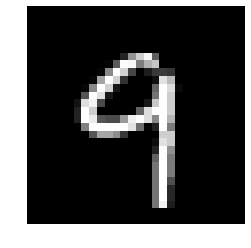

Etiqueta 9


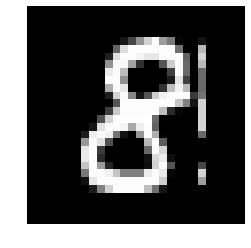

Etiqueta 8


In [12]:
for i in range(1,10):
    vis_imagen(i,conjunto="train")

In [13]:
x=tf.placeholder(tf.float32, shape=[None, 784])
y=tf.placeholder(tf.float32, shape=[None, 10])

In [15]:
#capa 1
W_1 = tf.Variable(tf.truncated_normal(shape = [784,512], stddev=0.2))
b_1 = tf.Variable(tf.zeros([512]))
#capa 2
W_2 = tf.Variable(tf.truncated_normal(shape = [512,10], stddev=0.2))
b_2 = tf.Variable(tf.zeros([10]))

In [16]:
def NN(x):
    #capa 1 capa escondida
    z_1 = tf.matmul(x, W_1) + b_1
    a_1 = tf.nn.relu(z_1)
    #capa 2 salida
    z_2 = tf.matmul(a_1,W_2) + b_2
    
    return z_2

In [19]:
y_ = NN(x)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_, labels = y))

In [20]:
train_pred = tf.nn.softmax(y_) 
y_valid = NN(mnist.validation.images)
valid_pred = tf.nn.softmax(y_valid)

In [21]:
opt = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [22]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [23]:
def precision(predicciones, etiquetas):
    #calcula el porcentaje de predicciones correctas
    return (100.0 * np.sum(np.argmax(predicciones, 1) == np.argmax(etiquetas, 1))
          / predicciones.shape[0])

In [24]:
%%time 

pasos = 10000

print("Entrenamiento:")
for i in range(pasos):
    #solo le pasamos de 100 imagenes porque si se manda todo requiere de mucho procesamiento
    batch = mnist.train.next_batch(100)
    _,costo,predicciones =  sess.run([opt, cross_entropy, train_pred],  feed_dict={x: batch[0], y: batch[1]})
    
    #cada 500 veces imprimimos los resultados
    if (i % 500 == 0):
        print("Costo del minibatch hasta el paso %d: %f" % (i, costo))
        print("Precisión en el conjunto de entrenamiento: %.1f%%" % precision(predicciones, batch[1]))
        print("Precision en el conjunto de validación: %.1f%%" % precision(
        valid_pred.eval(session=sess), mnist.validation.labels))
        print("\n")

Entrenamiento:
Costo del minibatch hasta el paso 0: 8.955357
Precisión en el conjunto de entrenamiento: 8.0%
Precision en el conjunto de validación: 14.5%


Costo del minibatch hasta el paso 500: 0.200016
Precisión en el conjunto de entrenamiento: 94.0%
Precision en el conjunto de validación: 96.2%


Costo del minibatch hasta el paso 1000: 0.089764
Precisión en el conjunto de entrenamiento: 98.0%
Precision en el conjunto de validación: 96.7%


Costo del minibatch hasta el paso 1500: 0.090512
Precisión en el conjunto de entrenamiento: 97.0%
Precision en el conjunto de validación: 96.9%


Costo del minibatch hasta el paso 2000: 0.074194
Precisión en el conjunto de entrenamiento: 97.0%
Precision en el conjunto de validación: 97.3%


Costo del minibatch hasta el paso 2500: 0.009677
Precisión en el conjunto de entrenamiento: 100.0%
Precision en el conjunto de validación: 97.4%


Costo del minibatch hasta el paso 3000: 0.020234
Precisión en el conjunto de entrenamiento: 99.0%
Precision en el

In [25]:
y_test = NN(mnist.test.images)
test_prediction = tf.nn.softmax(y_test)
print("Precisión en el conjunto de PRUEBA: %.1f%%" % precision(test_prediction.eval(session = sess), mnist.test.labels))  

Precisión en el conjunto de PRUEBA: 97.9%


Predicción: 2


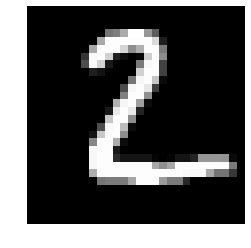

Etiqueta 2
Predicción: 1


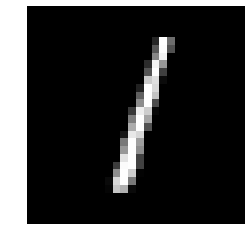

Etiqueta 1
Predicción: 0


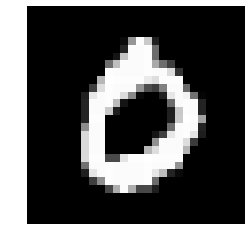

Etiqueta 0
Predicción: 4


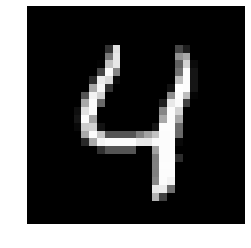

Etiqueta 4
Predicción: 1


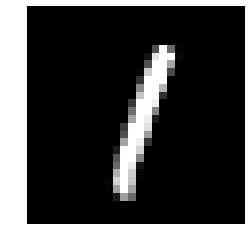

Etiqueta 1
Predicción: 4


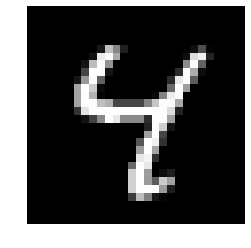

Etiqueta 4
Predicción: 9


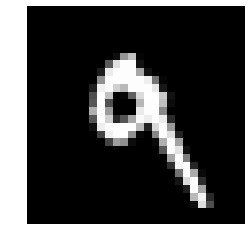

Etiqueta 9
Predicción: 6


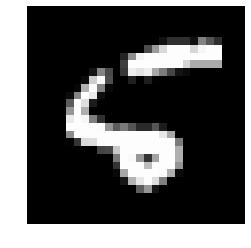

Etiqueta 5
Predicción: 9


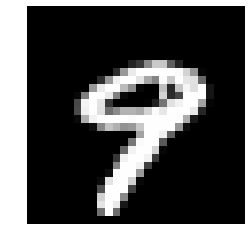

Etiqueta 9
Predicción: 0


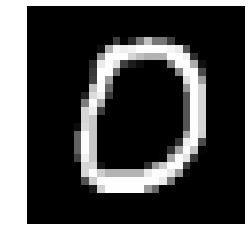

Etiqueta 0
Predicción: 6


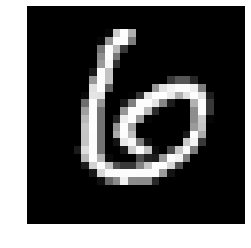

Etiqueta 6
Predicción: 9


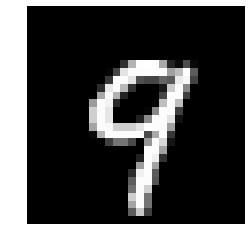

Etiqueta 9
Predicción: 0


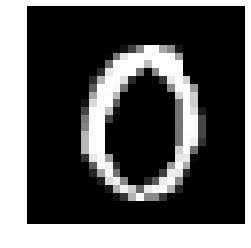

Etiqueta 0
Predicción: 1


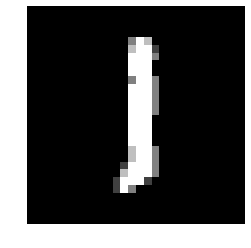

Etiqueta 1
Predicción: 5


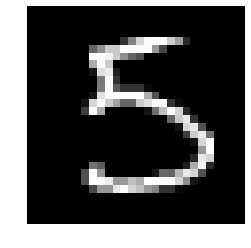

Etiqueta 5
Predicción: 9


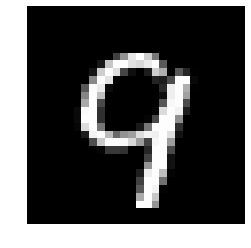

Etiqueta 9
Predicción: 7


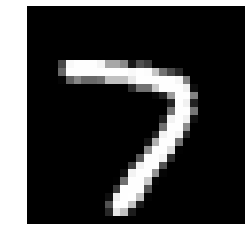

Etiqueta 7
Predicción: 3


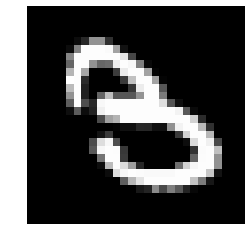

Etiqueta 3
Predicción: 4


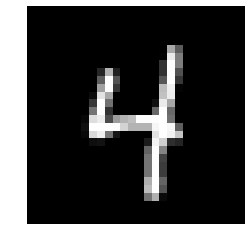

Etiqueta 4
Predicción: 9


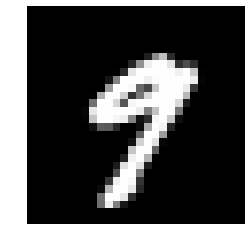

Etiqueta 9
Predicción: 6


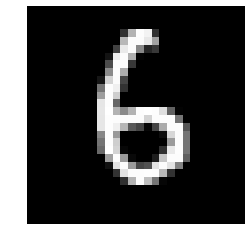

Etiqueta 6
Predicción: 6


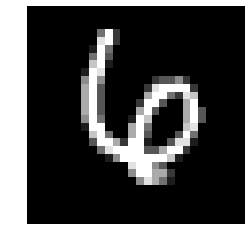

Etiqueta 6
Predicción: 5


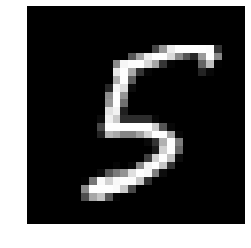

Etiqueta 5
Predicción: 4


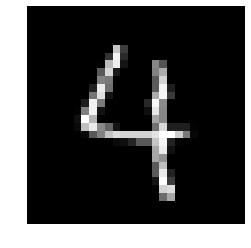

Etiqueta 4
Predicción: 0


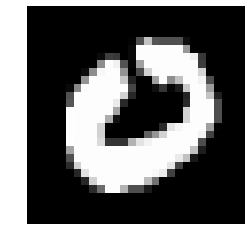

Etiqueta 0
Predicción: 7


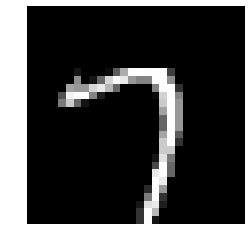

Etiqueta 7
Predicción: 4


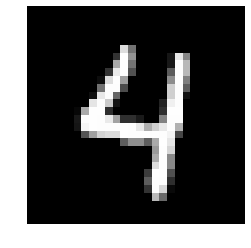

Etiqueta 4
Predicción: 0


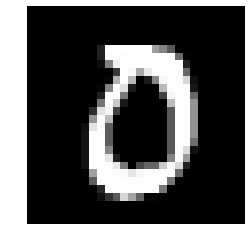

Etiqueta 0
Predicción: 1


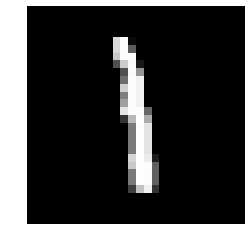

Etiqueta 1
Predicción: 3


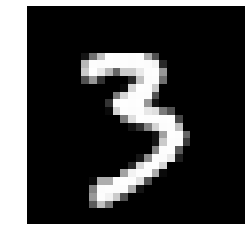

Etiqueta 3
Predicción: 1


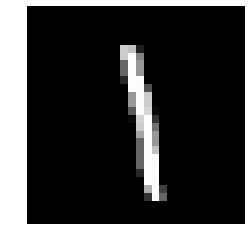

Etiqueta 1
Predicción: 3


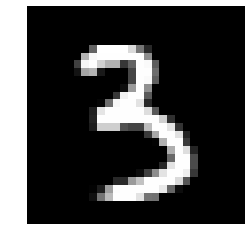

Etiqueta 3
Predicción: 4


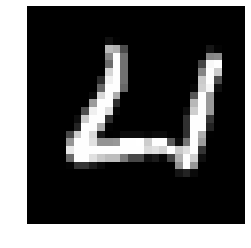

Etiqueta 4
Predicción: 7


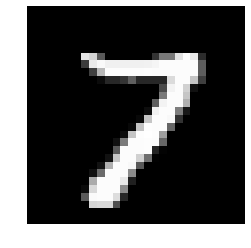

Etiqueta 7
Predicción: 2


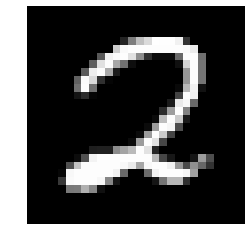

Etiqueta 2
Predicción: 7


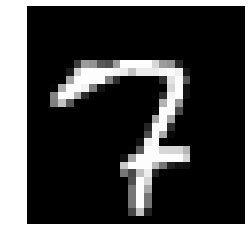

Etiqueta 7
Predicción: 1


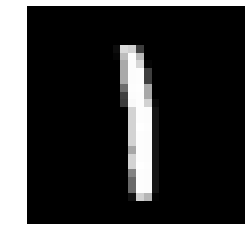

Etiqueta 1
Predicción: 2


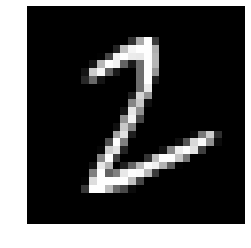

Etiqueta 2
Predicción: 1


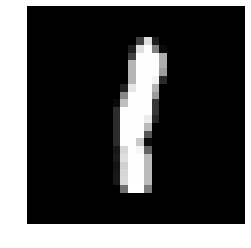

Etiqueta 1
Predicción: 1


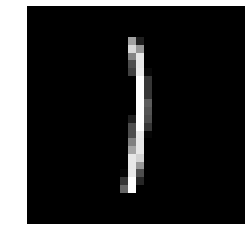

Etiqueta 1
Predicción: 7


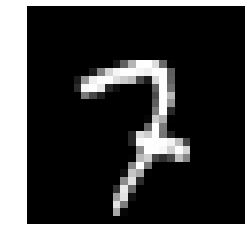

Etiqueta 7
Predicción: 4


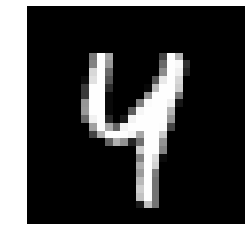

Etiqueta 4
Predicción: 2


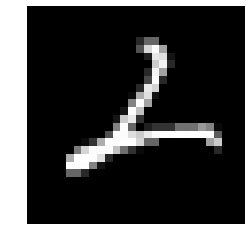

Etiqueta 2
Predicción: 3


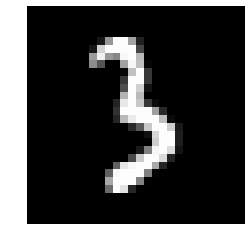

Etiqueta 3
Predicción: 5


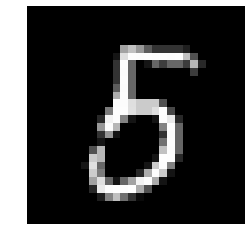

Etiqueta 5
Predicción: 1


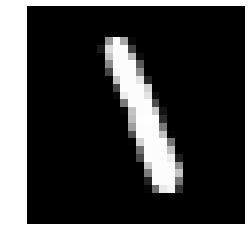

Etiqueta 1
Predicción: 2


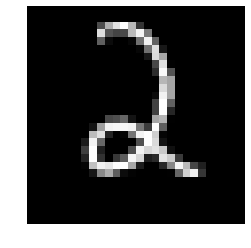

Etiqueta 2
Predicción: 4


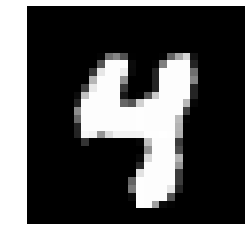

Etiqueta 4
Predicción: 4


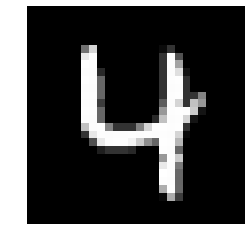

Etiqueta 4


In [26]:
for x in range(1,50):
    indice = x
    p = tf.argmax(NN(mnist.test.images[indice:indice+1]).eval(session = sess),1)
    print("Predicción:", sess.run(p)[0])
    vis_imagen(indice, conjunto="test")
    print("===========================")

In [29]:
from PIL import Image
imagen = "9.png"
img = Image.open(imagen).convert('L')

if  img.size != (28,28):
    img.thumbnail((28,28), Image.ANTIALIAS)

entrada = np.array(img, dtype = np.float32)
entrada = entrada.reshape((1,784))
entrada = entrada/255.0
        
p = tf.argmax(NN(entrada).eval(session = sess),1)
print("Imágen:{}".format(imagen))
img.show()
print("Predicción:", sess.run(p)[0])

Imágen:9.png
Predicción: 9
